In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('/content/drive/MyDrive/abc.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9579 entries, 0 to 9578
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9579 non-null   int64  
 1   CODE_GENDER          9579 non-null   object 
 2   FLAG_OWN_CAR         9579 non-null   object 
 3   FLAG_OWN_REALTY      9579 non-null   object 
 4   CNT_CHILDREN         9579 non-null   int64  
 5   AMT_INCOME_TOTAL     9579 non-null   float64
 6   NAME_INCOME_TYPE     9579 non-null   object 
 7   NAME_EDUCATION_TYPE  9579 non-null   object 
 8   NAME_FAMILY_STATUS   9579 non-null   object 
 9   NAME_HOUSING_TYPE    9579 non-null   object 
 10  DAYS_BIRTH           9579 non-null   int64  
 11  DAYS_EMPLOYED        9579 non-null   int64  
 12  FLAG_MOBIL           9579 non-null   int64  
 13  FLAG_WORK_PHONE      9579 non-null   int64  
 14  FLAG_PHONE           9579 non-null   int64  
 15  FLAG_EMAIL           9579 non-null   i

#### GENDER


In [15]:
df['CODE_GENDER'].value_counts()

F    6227
M    3352
Name: CODE_GENDER, dtype: int64

#### Применили one-hot encoding для переменной гендера

In [16]:
Gender_mapping = {"F": "FEMALE", "M": "MALE"}
df['CODE_GENDER'] = df['CODE_GENDER'].map(Gender_mapping)
df = pd.concat([df, pd.get_dummies(df['CODE_GENDER'])], axis=1)
df.drop('CODE_GENDER', axis=1, inplace=True)

#### FLAG_OWN_CAR and FLAG_OWN_REALTY


In [17]:
Own_property_mapping = {"N": 0, "Y": 1}
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map(Own_property_mapping)
df['FLAG_OWN_REALTY'].value_counts()

1    6435
0    3144
Name: FLAG_OWN_REALTY, dtype: int64

In [18]:
Own_car_mapping = {"N": 0, "Y": 1}
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map(Own_car_mapping)
df['FLAG_OWN_CAR'].value_counts()

0    6062
1    3517
Name: FLAG_OWN_CAR, dtype: int64

#### CNT_CHILDREN and CNT_FAM_MEMBERS

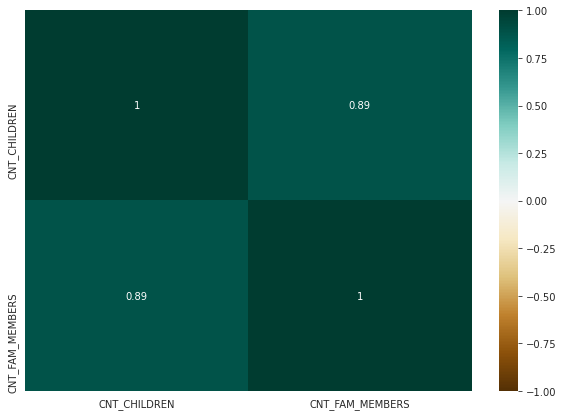

In [19]:
# Выдвигаем гипотезу о том, что между двумя этими фичами будет сильная корреляция. После построения эта гипотеза подтверждается, а значит, можем удалить одну из фичей. Путь это будет количество детей, так как у 2/3 нашей выборки детей нет. 
correlation = df[['CNT_CHILDREN','CNT_FAM_MEMBERS']]
plt.figure(figsize=(10, 7))
sns.heatmap(correlation.corr(), annot=True, cmap="BrBG", vmax=1, vmin=-1);

In [20]:
df['CNT_CHILDREN'].value_counts()

0     6718
1     1869
2      838
3      128
4       19
5        4
7        1
14       1
19       1
Name: CNT_CHILDREN, dtype: int64

In [21]:
df = df.drop(['CNT_CHILDREN'], axis=1)

#### AMT_INCOME_TOTAL

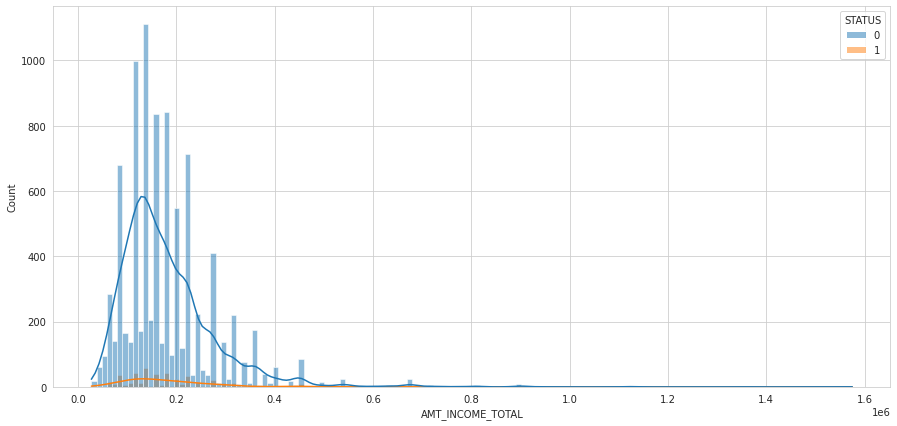

In [22]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df, hue='STATUS', x="AMT_INCOME_TOTAL", kde=True);

In [23]:
df['AMT_INCOME_TOTAL'] = np.log(df['AMT_INCOME_TOTAL'])

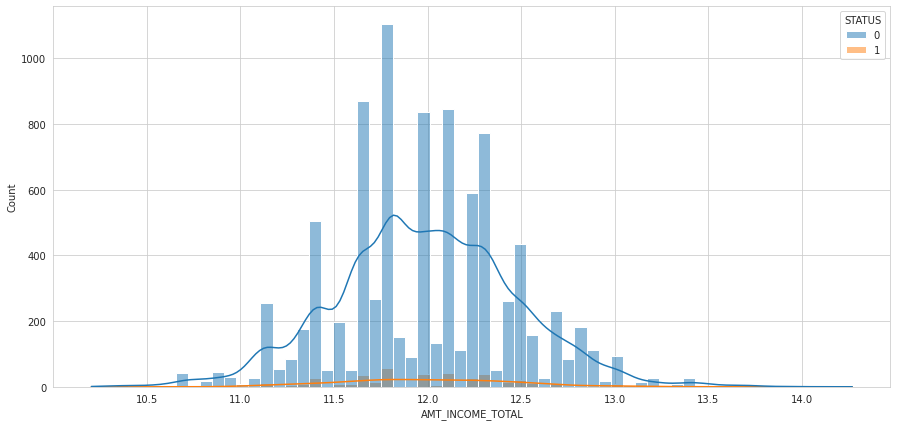

In [24]:
#После логарфмирование деньги уже более менее нормально распределены
plt.figure(figsize=(15, 7))
sns.histplot(data=df, hue='STATUS', x="AMT_INCOME_TOTAL", kde=True);

#### NAME_INCOME_TYPE


In [25]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 4888
Commercial associate    2279
Pensioner               1686
State servant            723
Student                    3
Name: NAME_INCOME_TYPE, dtype: int64

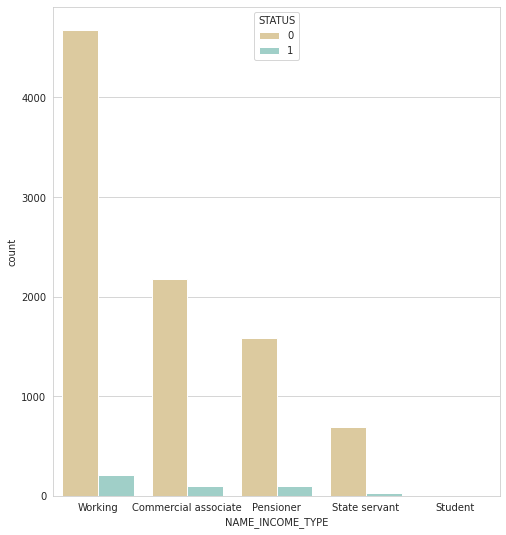

In [26]:
plt.figure(figsize=(8, 9))
sns.set_style('whitegrid') 
sns.countplot(x='NAME_INCOME_TYPE', hue='STATUS', palette = "BrBG", data=df, order = df['NAME_INCOME_TYPE'].value_counts().index)

In [27]:
df = pd.concat([df, pd.get_dummies(df['NAME_INCOME_TYPE'])], axis=1)
df.drop('NAME_INCOME_TYPE', axis=1, inplace=True)

#### NAME_EDUCATION_TYPE


In [28]:
# Переделаем высшее образование как бинарную переменную, где 0 - у человека образование ниже среднего, 1 - высшее и выше
Education_level_mapping = {"Secondary / secondary special": 0, "Lower secondary": 0, "Incomplete higher": 0, "Higher education": 1, "Academic degree": 1}
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map(Education_level_mapping)
df['NAME_EDUCATION_TYPE'].value_counts()

0    7146
1    2433
Name: NAME_EDUCATION_TYPE, dtype: int64

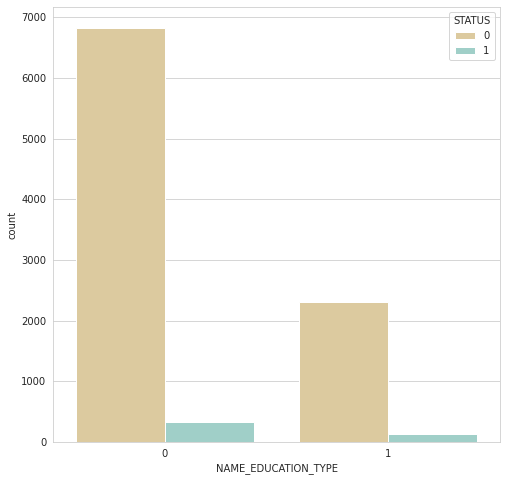

In [29]:
plt.figure(figsize=(8, 8))
sns.set_style('whitegrid') 
sns.countplot(x='NAME_EDUCATION_TYPE', hue='STATUS', palette = "BrBG", data=df, order = df['NAME_EDUCATION_TYPE'].value_counts().index);

#### NAME_FAMILY_STATUS

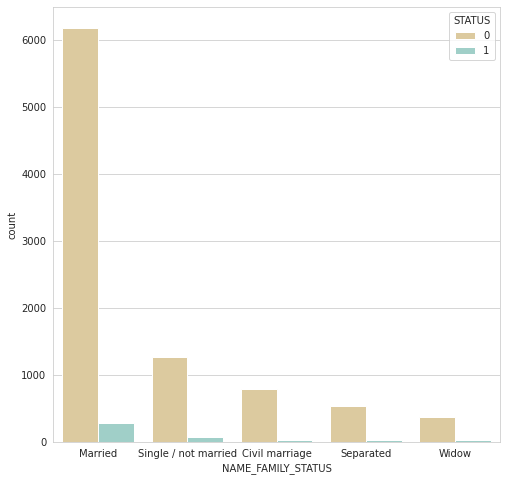

In [30]:
plt.figure(figsize=(8, 8))
sns.set_style('whitegrid') 
sns.countplot(x='NAME_FAMILY_STATUS', hue='STATUS', palette = "BrBG", data=df, order = df['NAME_FAMILY_STATUS'].value_counts().index);

In [31]:
df = pd.concat([df, pd.get_dummies(df['NAME_FAMILY_STATUS'])], axis=1)
df.drop('NAME_FAMILY_STATUS', axis=1, inplace=True)

#### NAME_HOUSING_TYPE

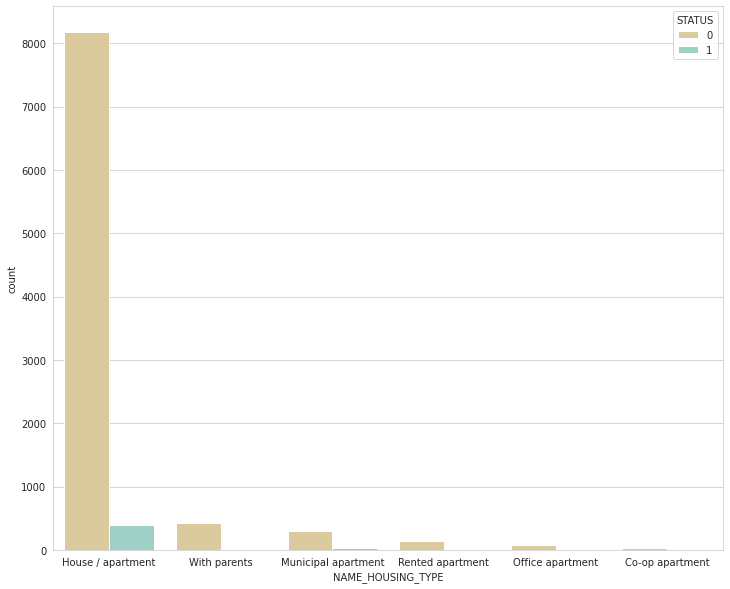

In [32]:
plt.figure(figsize=(12, 10))
sns.set_style('whitegrid') 
sns.countplot(x='NAME_HOUSING_TYPE', hue='STATUS', palette = "BrBG", data=df, order = df['NAME_HOUSING_TYPE'].value_counts().index);

In [33]:
df = pd.concat([df, pd.get_dummies(df['NAME_HOUSING_TYPE'])], axis=1)
df.drop('NAME_HOUSING_TYPE', axis=1, inplace=True)

#### DAYS_BIRTH

In [34]:
df['AGE'] = df['DAYS_BIRTH']//-(365)
df = df.drop(['DAYS_BIRTH'], axis=1)

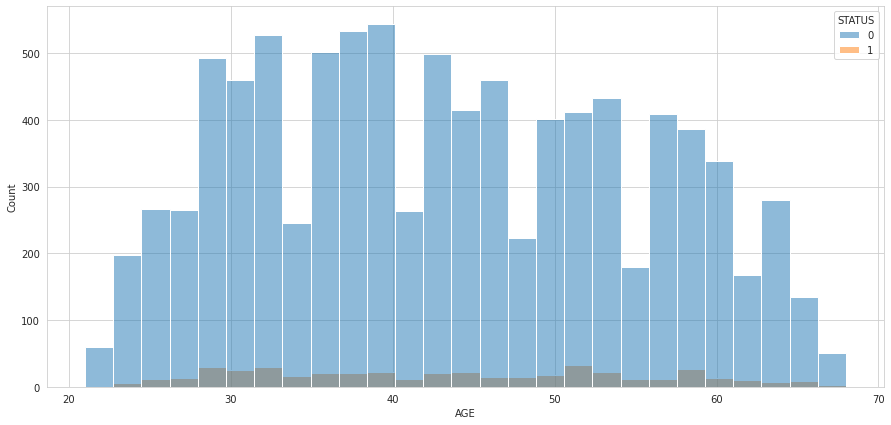

In [35]:
plt.figure(figsize=(15, 7))
sns.histplot(data=df, hue='STATUS', x="AGE");

#### DAYS_EMPLOYED

In [36]:
#0 - у человека нет постоянной работы уже больше 90 дней, 1 - у человека есть работа более 90 дней
df.loc[(df['DAYS_EMPLOYED'] < 90), 'DAYS_EMPLOYED'] = 0
df.loc[(df['DAYS_EMPLOYED'] >= 90), 'DAYS_EMPLOYED'] = 1

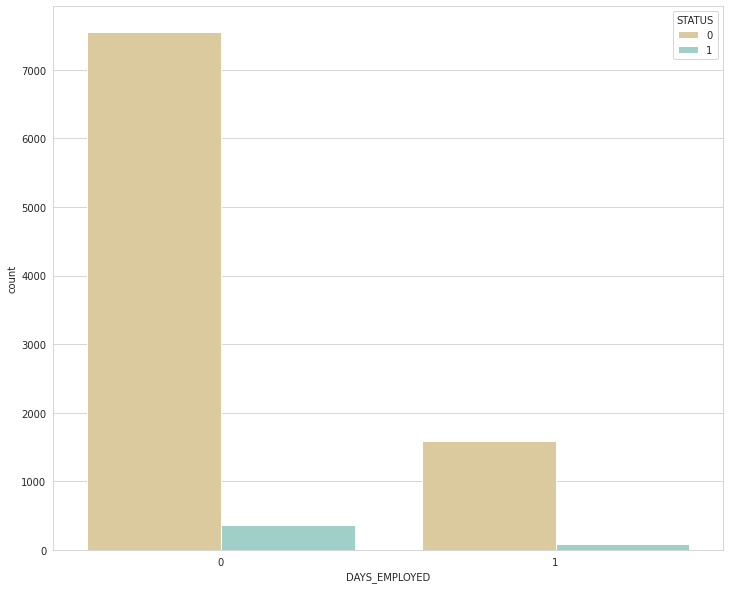

In [37]:
plt.figure(figsize=(12, 10))
sns.set_style('whitegrid') 
sns.countplot(x='DAYS_EMPLOYED', hue='STATUS', palette = "BrBG", data=df, order = df['DAYS_EMPLOYED'].value_counts().index);

In [38]:
df['DAYS_EMPLOYED'].value_counts()

0    7909
1    1670
Name: DAYS_EMPLOYED, dtype: int64

In [39]:
df = df.rename(columns={"DAYS_EMPLOYED": "STABLE_WORK"})

#### FLAG_MOBIL

In [40]:
# Так как у всех указан мобильный номер телефона, то мы можем дропнуть данную переменную.
df['FLAG_MOBIL'].value_counts()

1    9579
Name: FLAG_MOBIL, dtype: int64

In [41]:
 df = df.drop('FLAG_MOBIL', axis=1) 

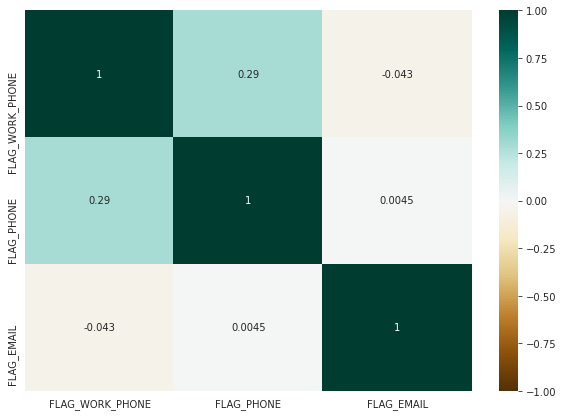

In [42]:
#Предположим, что у нас будет высокая корреляция между указанием номеров (рабочих и домашних) и почты. После построения графика корреляции видим, что скорее нет, чем да. 
correlation_1 = df[["FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"]]
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_1.corr(), annot=True, cmap="BrBG", vmax=1, vmin=-1);

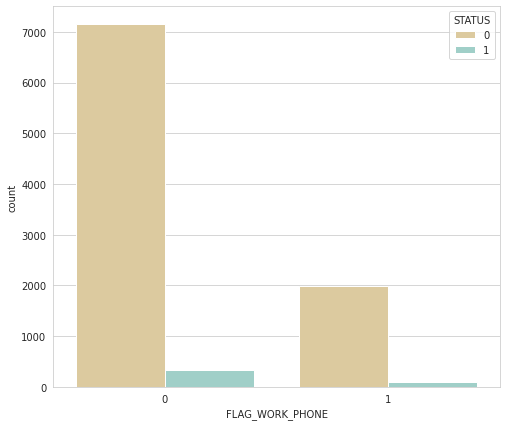

In [43]:
plt.figure(figsize=(8, 7))
sns.set_style('whitegrid') 
sns.countplot(x='FLAG_WORK_PHONE', hue='STATUS', palette = "BrBG", data=df, order = df['FLAG_WORK_PHONE'].value_counts().index);

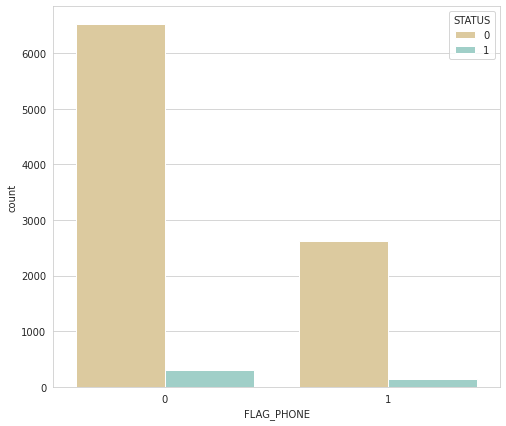

In [44]:
plt.figure(figsize=(8, 7))
sns.set_style('whitegrid') 
sns.countplot(x='FLAG_PHONE', hue='STATUS', palette = "BrBG", data=df, order = df['FLAG_PHONE'].value_counts().index);

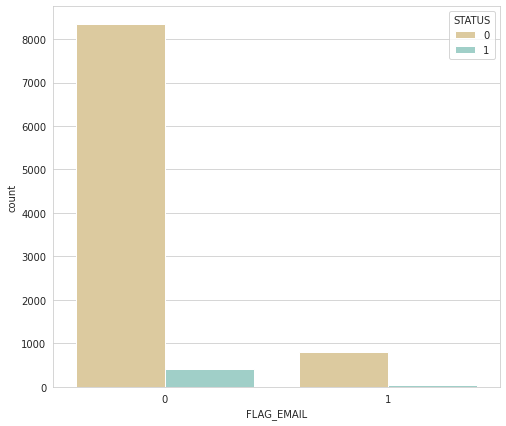

In [45]:
plt.figure(figsize=(8, 7))
sns.set_style('whitegrid') 
sns.countplot(x='FLAG_EMAIL', hue='STATUS', palette = "BrBG", data=df, order = df['FLAG_EMAIL'].value_counts().index);

#### OCCUPATION_TYPE

In [46]:
#df
df['OCCUPATION_TYPE'].isnull().sum()

2965

In [47]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna("Unknown")
df['OCCUPATION_TYPE'].value_counts()

Unknown                  2965
Laborers                 1695
Sales staff               940
Core staff                862
Managers                  767
Drivers                   615
High skill tech staff     358
Accountants               297
Medicine staff            293
Cooking staff             186
Security staff            182
Cleaning staff            143
Private service staff      80
Low-skill Laborers         55
Secretaries                46
Waiters/barmen staff       40
HR staff                   23
IT staff                   19
Realty agents              13
Name: OCCUPATION_TYPE, dtype: int64

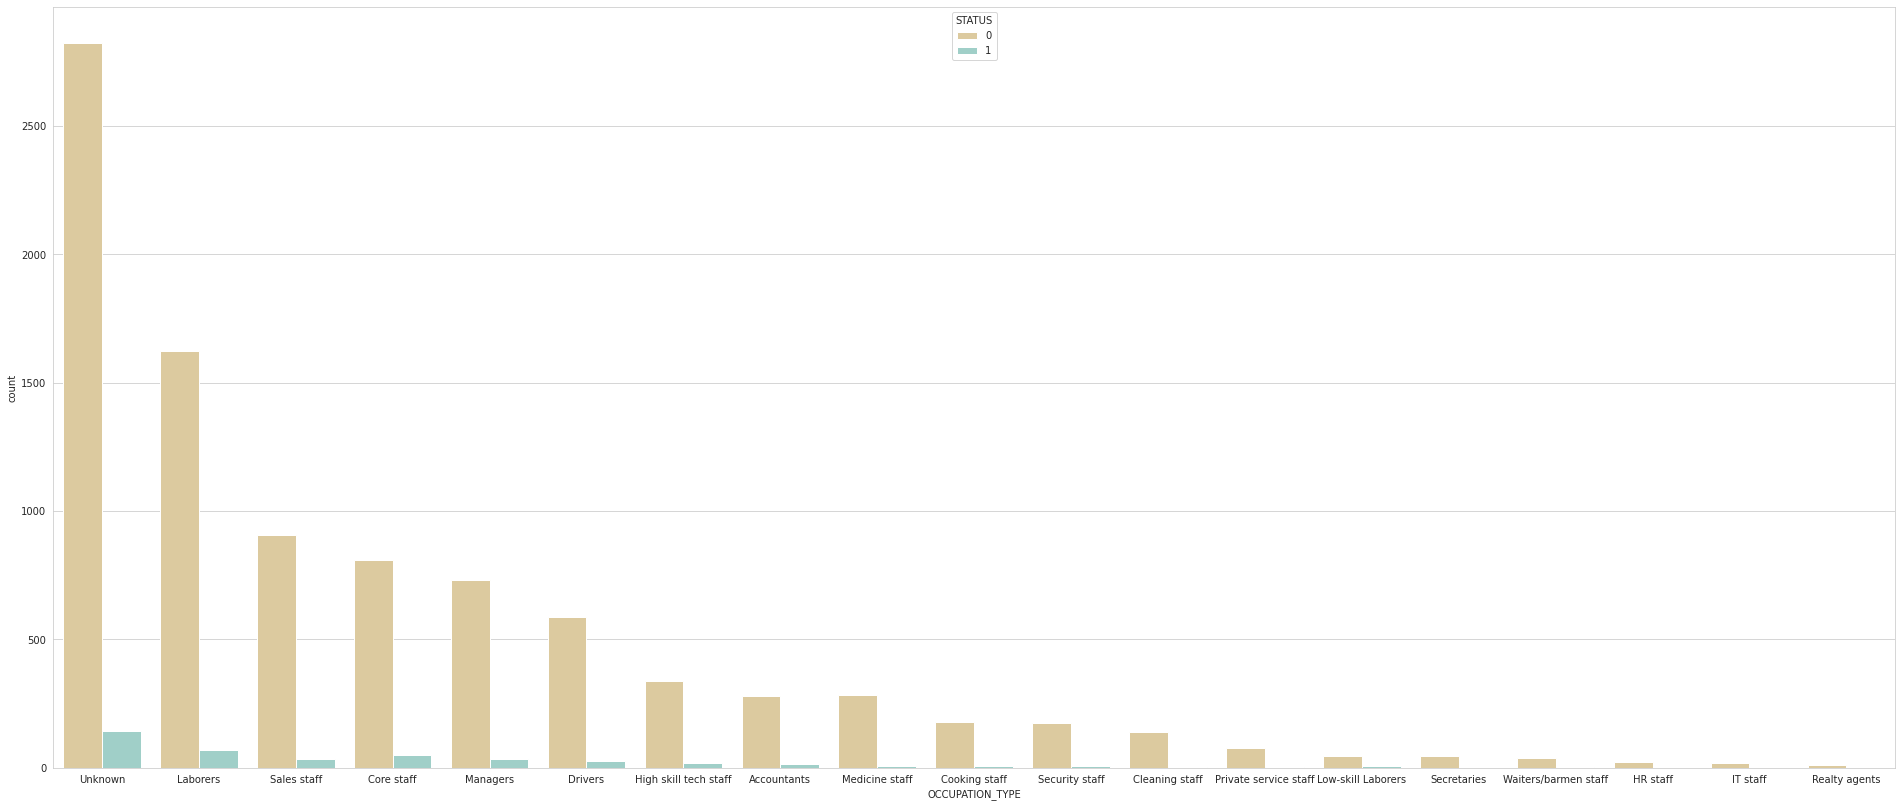

In [48]:
plt.figure(figsize=(33, 14))
sns.set_style('whitegrid') 
sns.countplot(x='OCCUPATION_TYPE', hue='STATUS', palette = "BrBG", data=df, order = df['OCCUPATION_TYPE'].value_counts().index);

In [49]:
df = df.drop(['OCCUPATION_TYPE'], axis=1)

In [50]:
df.corr()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,STABLE_WORK,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,FEMALE,MALE,Commercial associate,Pensioner,State servant,Student,Working,Civil marriage,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,AGE
ID,1.000000,-0.007769,-0.074729,-0.009503,0.009484,-0.029966,0.070323,0.005535,-0.023769,0.013077,0.034336,-0.014314,0.014314,0.008883,-0.029450,-0.003825,-0.021016,0.017634,-0.009054,0.000073,-0.006991,0.019896,-0.013800,0.010695,-0.023053,0.004807,0.021288,0.002792,0.015968,-0.039272
FLAG_OWN_CAR,-0.007769,1.000000,-0.007222,0.233404,0.092893,-0.146791,0.029762,0.008968,0.017586,0.141770,-0.007519,-0.355678,0.355678,0.058618,-0.145032,-0.012671,-0.013482,0.067730,-0.027113,0.149209,-0.057162,-0.080117,-0.105414,0.014894,0.010573,-0.033946,0.015331,-0.008141,0.007449,-0.125247
FLAG_OWN_REALTY,-0.074729,-0.007222,1.000000,0.028330,-0.005846,0.086212,-0.186296,-0.053085,0.053773,0.004190,-0.042312,0.055383,-0.055383,-0.005739,0.085452,-0.021628,-0.000193,-0.048775,-0.002265,0.018325,0.001070,-0.037073,0.023222,-0.009257,0.215543,-0.136670,-0.052938,-0.052772,-0.143939,0.136776
AMT_INCOME_TOTAL,-0.009503,0.233404,0.028330,1.000000,0.229478,-0.209979,-0.043287,0.008722,0.098768,0.027208,0.007603,-0.233888,0.233888,0.187539,-0.205879,0.033916,-0.005791,-0.020620,0.001707,-0.003751,0.010450,0.027899,-0.054124,0.005351,-0.005733,-0.007688,0.029261,0.022369,-0.012200,-0.107501
NAME_EDUCATION_TYPE,0.009484,0.092893,-0.005846,0.229478,1.000000,-0.101245,0.000513,0.041181,0.100870,0.024117,0.011129,0.018798,-0.018798,0.101465,-0.099017,0.102920,0.016780,-0.065975,-0.043371,0.027997,0.013799,0.021700,-0.058733,0.012363,0.009391,-0.040131,0.000503,-0.015823,0.026121,-0.118309
STABLE_WORK,-0.029966,-0.146791,0.086212,-0.209979,-0.101245,1.000000,-0.243121,-0.003437,-0.082024,-0.212093,0.006482,0.168105,-0.168105,-0.256749,0.994237,-0.131295,-0.008133,-0.469062,-0.035893,-0.034571,0.010775,-0.052964,0.209840,-0.018706,0.092156,-0.002476,-0.026326,-0.036954,-0.095317,0.617821
FLAG_WORK_PHONE,0.070323,0.029762,-0.186296,-0.043287,0.000513,-0.243121,1.000000,0.290632,-0.043324,0.065016,0.008825,-0.060306,0.060306,0.008046,-0.241878,0.016133,-0.009365,0.169220,0.023794,0.024564,-0.005050,-0.020588,-0.049020,0.005631,-0.030176,0.001734,0.013884,0.006326,0.031683,-0.182577
FLAG_PHONE,0.005535,0.008968,-0.053085,0.008722,0.041181,-0.003437,0.290632,1.000000,0.004504,-0.013581,0.009655,0.017773,-0.017773,0.013573,-0.001368,-0.013173,-0.011252,-0.003160,-0.017457,0.022276,0.024093,-0.039183,0.011842,-0.004103,0.023530,0.006665,-0.003720,-0.035800,-0.016628,0.038595
FLAG_EMAIL,-0.023769,0.017586,0.053773,0.098768,0.100870,-0.082024,-0.043324,0.004504,1.000000,0.003477,-0.003016,-0.011155,0.011155,0.071452,-0.079197,0.005137,0.036257,-0.004526,0.011160,-0.013899,-0.001787,0.026123,-0.026171,-0.012642,-0.009608,-0.006052,-0.007527,0.021740,0.013501,-0.109500
CNT_FAM_MEMBERS,0.013077,0.141770,0.004190,0.027208,0.024117,-0.212093,0.065016,-0.013581,0.003477,1.000000,0.000658,-0.079895,0.079895,0.034233,-0.210406,0.034380,-0.003506,0.113088,0.061972,0.489453,-0.213624,-0.422978,-0.248261,0.008383,0.021761,-0.020564,0.011904,-0.024641,-0.007504,-0.275951


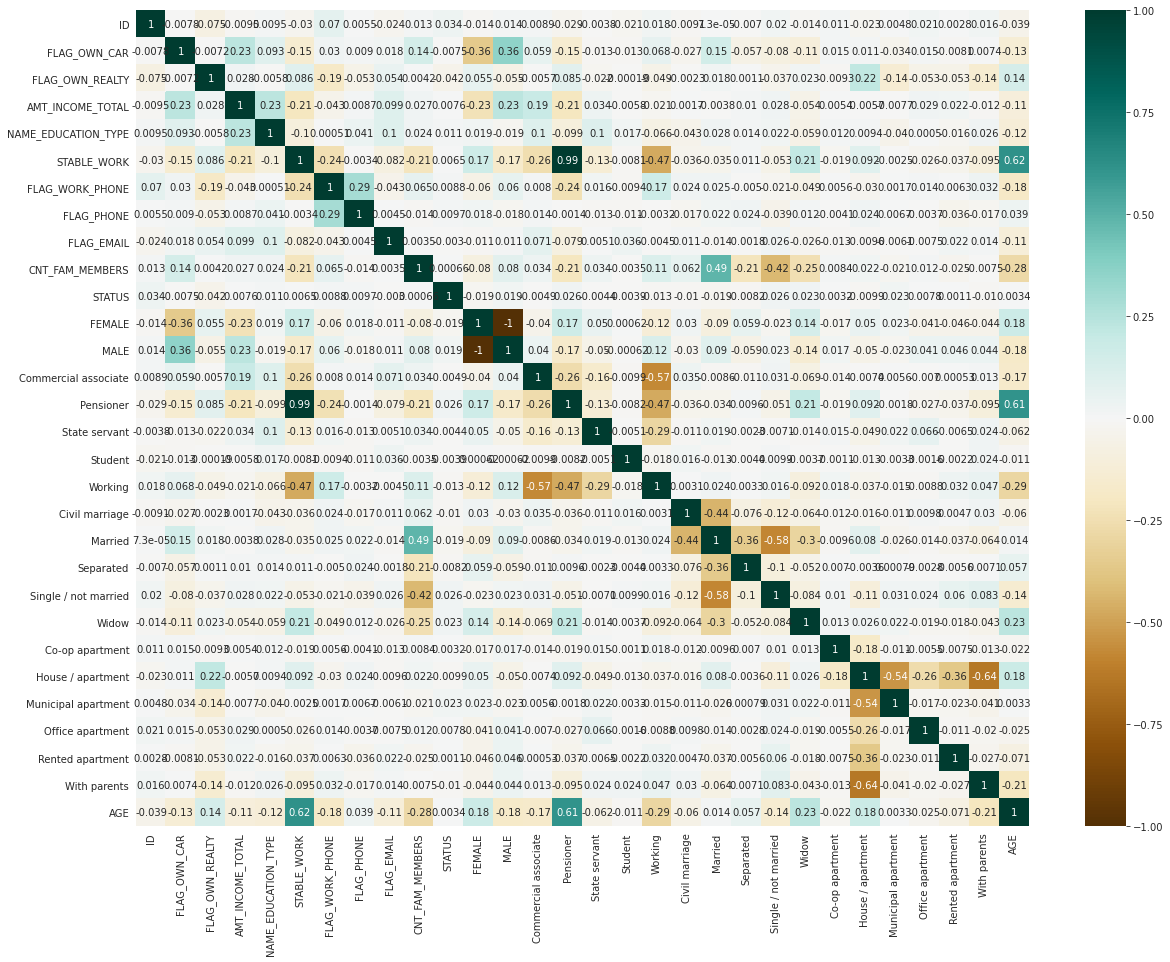

In [51]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap="BrBG", vmax=1, vmin=-1);

In [52]:
# Проверка на отклонения
features_with_small_variance = df.columns[(df.std(axis = 0) < .01)]
len(features_with_small_variance)

0

In [53]:
df.to_csv('final_data_2.csv')